In [39]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load data from run_results.jsonl
data = []
with open('final_position.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert to DataFrame
position_df = pd.DataFrame(data)
position_df

,timestamp,USD,pair,total_value,duration_seconds,coin_quantity,coin_value,best_ask
0,2025-03-24T20:35:21.648764,1.701018e+06,BTCUSDT,9.989931e+06,900.627047,94.918227,8.288913e+06,87326.88
1,2025-03-24T20:50:38.694971,2.061500e+02,BTCUSDT,1.001091e+07,900.616204,114.524463,1.001070e+07,87411.01
2,2025-03-24T21:06:05.773355,8.161251e+04,BTCUSDT,1.000143e+07,900.643943,113.683499,9.919821e+06,87258.23
3,2025-03-24T21:21:22.852059,3.259617e+06,BTCUSDT,1.000636e+07,900.676242,77.389533,6.746738e+06,87178.95
4,2025-03-24T21:36:39.944951,9.353192e+05,BTCUSDT,1.002238e+07,900.674007,103.970933,9.087060e+06,87400.00


In [ ]:
# Analyze final positions
# all_positions = []
# for index, row in df.iterrows():
#     for position in row['final_positions']:
#         position['run_number'] = row['run_number']
#         all_positions.append(position)

# positions_df = pd.DataFrame(all_positions)
# positions_df

In [17]:
# Basic statistics
print("Total runs:", len(position_df))
print("Average duration per run:", position_df['duration_seconds'].mean(), "seconds")
print("Total positions recorded:", len(position_df))

Total runs: 5
Average duration per run: 900.6474886 seconds
Total positions recorded: 5


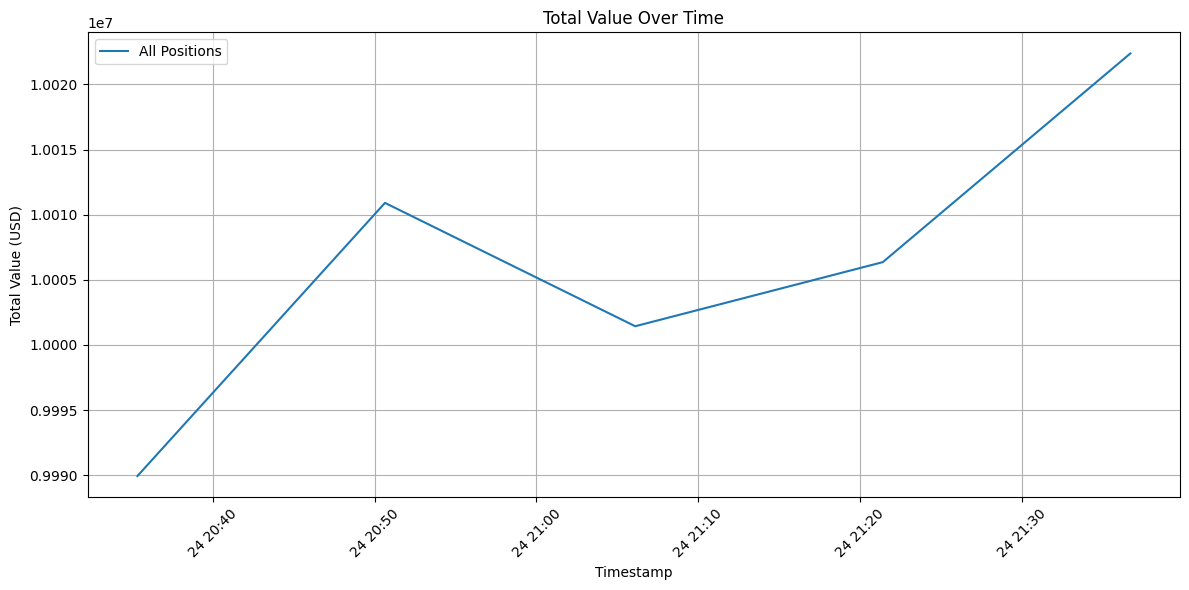

In [19]:
# Plot total value over time
plt.figure(figsize=(12, 6))

# Convert timestamp to datetime for proper plotting
position_df['timestamp'] = pd.to_datetime(position_df['timestamp'])

# Plot all positions
plt.plot(position_df['timestamp'], position_df['total_value'], label='All Positions')

# Formatting
plt.title('Total Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Value (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

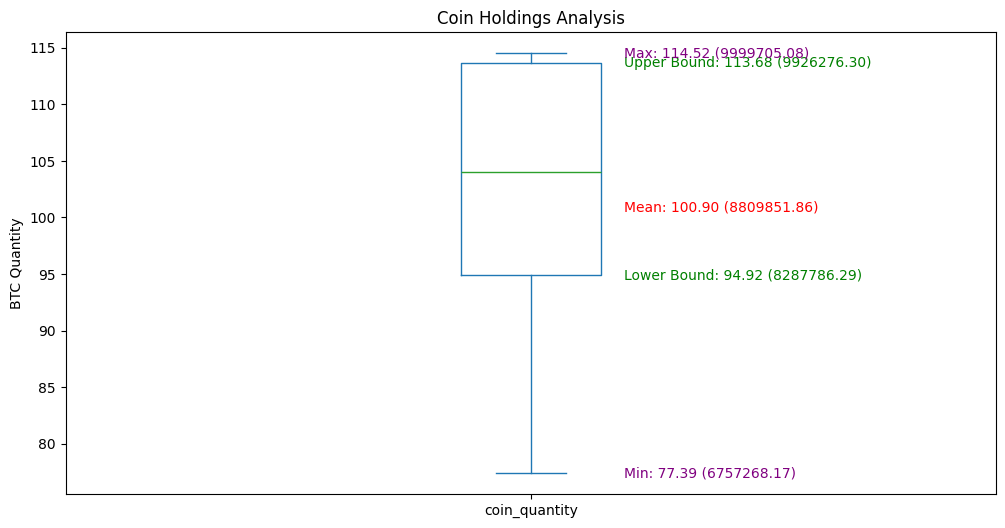

In [28]:
# Analyze coin holdings
# Change the plot type to 'box' for a box plot
boxplot = position_df['coin_quantity'].plot(kind='box', figsize=(12, 6), title='Coin Holdings Analysis')
plt.ylabel('BTC Quantity')
# The x - axis label is not relevant for a box plot, so we can remove it
# plt.xlabel('Metrics')

# Calculate statistics
stats = position_df['coin_quantity'].describe()
mean = stats['mean']
q1 = stats['25%']
q3 = stats['75%']
max_val = stats['max']
min_val = stats['min']

# Assume best_bid is the value of the coin's best bid
best_ask = position_df['best_ask']  # Replace this with the actual best bid value
avg_best_ask = best_ask.mean()

# Add labels for mean, top bound, lower bound, max and min
boxplot.text(1.1, mean, f'Mean: {mean:.2f} ({mean * avg_best_ask:.2f})', verticalalignment='center', color='red')
boxplot.text(1.1, q1, f'Lower Bound: {q1:.2f} ({q1 * avg_best_ask:.2f})', verticalalignment='center', color='green')
boxplot.text(1.1, q3, f'Upper Bound: {q3:.2f} ({q3 * avg_best_ask:.2f})', verticalalignment='center', color='green')
boxplot.text(1.1, max_val, f'Max: {max_val:.2f} ({max_val * avg_best_ask:.2f})', verticalalignment='center', color='purple')
boxplot.text(1.1, min_val, f'Min: {min_val:.2f} ({min_val * avg_best_ask:.2f})', verticalalignment='center', color='purple')

plt.show()

In [29]:
# Correlation analysis
correlation_matrix = positions_df[['total_value', 'coin_quantity', 'coin_value', 'best_ask']].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,total_value,coin_quantity,coin_value,best_ask
total_value,1.000000,0.963391,0.962978,0.990012
coin_quantity,0.963391,1.000000,0.999995,0.977854
coin_value,0.962978,0.999995,1.000000,0.977876
best_ask,0.990012,0.977854,0.977876,1.000000


In [37]:
# Calculate performance metrics using independent total values
initial_value = 10000000

# Calculate returns for each entry
position_df['returns'] = (position_df['total_value'] - initial_value) / initial_value

# Average return (using all entries)
avg_return = position_df['returns'].mean()
print(position_df['returns'])

# Annualization factor for half-hour periods (24*365.25*2 = 17532 periods per year)
annualization_factor = 24 * 365.25 * 2
annualized_avg_return = (1 + avg_return) ** annualization_factor - 1

# Sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = position_df['returns'].mean() / position_df['returns'].std() * np.sqrt(annualization_factor)

# Max drawdown
position_df['drawdown'] = (position_df['total_value'] - initial_value) / initial_value
max_drawdown = position_df['drawdown'].min()

# Display results
print(f"Annualized Average Return: {annualized_avg_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

0   -0.001007
1    0.001091
2    0.000143
3    0.000636
4    0.002238
Name: returns, dtype: float64
Annualized Average Return: 5244914.95%
Sharpe Ratio: 68.70
Max Drawdown: -0.10%
